In [1]:
import numpy as np

# problem 1

# load raw data
f_raw = open("iris.data.txt", "r")
r_lines = f_raw.readlines();
f_raw.close()
n_records = len(r_lines)
p_data = np.zeros((n_records, 5), dtype=np.float32)
# -- Iris-setosa     1
# -- Iris-versicolor 2
# -- Iris-virginica  3

for i in range(n_records):
    l_fields = r_lines[i].split(",")
    p_data[i, 0] = float(l_fields[0])
    p_data[i, 1] = float(l_fields[1])
    p_data[i, 2] = float(l_fields[2])
    p_data[i, 3] = float(l_fields[3])
    # labels from string to 1,2,3
    if l_fields[4].strip() == "Iris-setosa":
        p_data[i, 4] = 1
    elif l_fields[4].strip() == "Iris-versicolor":
        p_data[i, 4] = 2
    else:
        p_data[i, 4] = 3
# save data to a txt file
np.savetxt("processed_iris_data.txt", p_data, fmt='%.6f', )
# load data from a txt file
l_data = np.loadtxt("processed_iris_data.txt")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# problem 2
# 2.1
l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
pdf["c"] = pdf["labels"] / 3.0
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
species = pdf["labels"].map(lambda x: species_wheel.get(int(x) + 1))
spm = pd.plotting.scatter_matrix(
    pdf[["sepal length", "sepal width", "petal length", "petal width"]], c=pdf["c"], figsize=(7, 5),
    label=["setosa", "versicolor", "virginica"], marker='.',
    hist_kwds={'bins': 20}, s=20, alpha=1, cmap='brg', diagonal='.')
handles = [plt.plot([], [], color=plt.cm.brg(i / 2.), ls="", marker=".", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
labels = ["setosa", "versicolor", "virginica"]
plt.legend(handles, labels, loc=(-2.94, 3.15))
plt.show()

<Figure size 700x500 with 16 Axes>

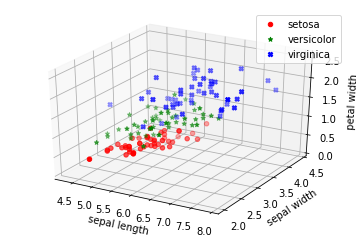

In [3]:
# 2.2
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(d1["sepal length"], d1["sepal width"], d1["petal width"], c='r', marker='o', label="setosa")
ax.scatter(d2["sepal length"], d2["sepal width"], d2["petal width"], c='g', marker='*', label="versicolor")
ax.scatter(d3["sepal length"], d3["sepal width"], d3["petal width"], c='b', marker='X', label="virginica")

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal width')
plt.legend(loc=0)
plt.show()

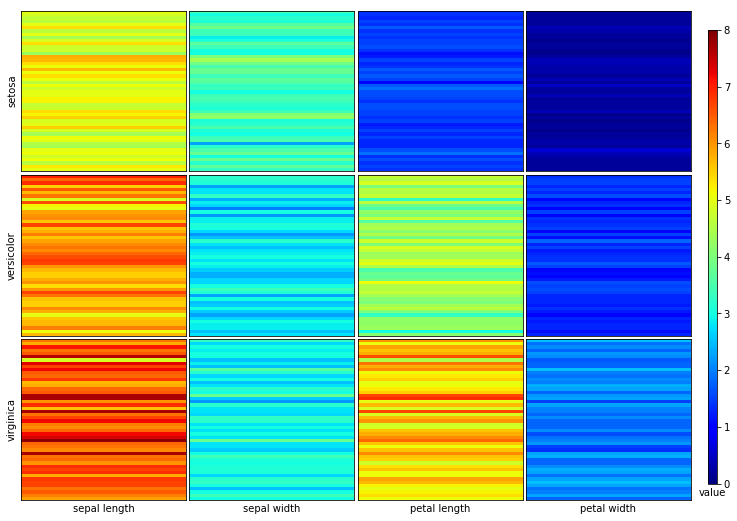

In [4]:
# 2.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(wspace=0.02, hspace=0.02)
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]

ims = []

cax=axs[0,0].imshow(d1["sepal length"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[0,1].imshow(d1["sepal width"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[0,2].imshow(d1["petal length"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[0,3].imshow(d1["petal width"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
axs[0,0].set_ylabel("setosa")

cax=axs[1,0].imshow(d2["sepal length"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[1,1].imshow(d2["sepal width"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[1,2].imshow(d2["petal length"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[1,3].imshow(d2["petal width"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
axs[1,0].set_ylabel("versicolor")

cax=axs[2,0].imshow(d3["sepal length"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[2,1].imshow(d3["sepal width"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[2,2].imshow(d3["petal length"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
cax=axs[2,3].imshow(d3["petal width"].values[:,np.newaxis], interpolation="None", cmap='jet',aspect='auto')
ims.append(cax)
axs[2,0].set_ylabel("virginica")

axs[2,0].set_xlabel("sepal length")
axs[2,1].set_xlabel("sepal width")
axs[2,2].set_xlabel("petal length")
axs[2,3].set_xlabel("petal width")

clims = [im.get_clim() for im in ims]
vmin = min([clim[0] for clim in clims])
vmax = max([clim[1] for clim in clims])
for im in ims:
    im.set_clim(vmin=np.floor(vmin),vmax=np.ceil(vmax))
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbar_ax.set_xlabel("value")
fig.colorbar(cax, cax=cbar_ax)
plt.show()

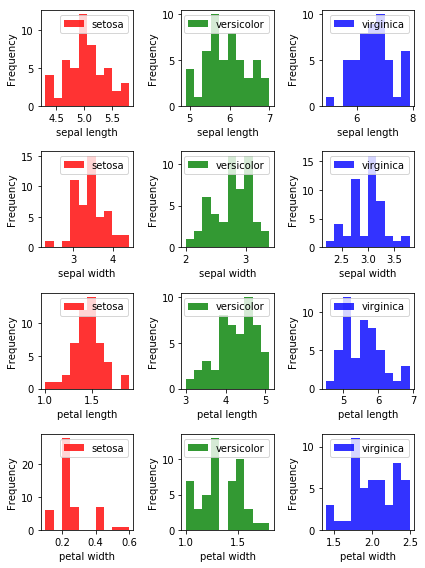

In [5]:
#2.4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
# fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []})
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(6, 8))

num_bins=10
axs[0,0].hist(d1["sepal length"].values, num_bins, color="r", alpha=0.8,label="setosa")
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_xlabel("sepal length")
axs[0,0].legend(loc=0)

axs[1,0].hist(d1["sepal width"].values, num_bins, color="r", alpha=0.8,label="setosa")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlabel("sepal width")
axs[1,0].legend(loc=0)

axs[2,0].hist(d1["petal length"].values, num_bins, color="r", alpha=0.8,label="setosa")
axs[2,0].set_ylabel("Frequency")
axs[2,0].set_xlabel("petal length")
axs[2,0].legend(loc=0)

axs[3,0].hist(d1["petal width"].values, num_bins, color="r", alpha=0.8,label="setosa")
axs[3,0].set_ylabel("Frequency")
axs[3,0].set_xlabel("petal width")
axs[3,0].legend(loc=0)


axs[0,1].hist(d2["sepal length"].values, num_bins, color="g", alpha=0.8,label="versicolor")
axs[0,1].set_ylabel("Frequency")
axs[0,1].set_xlabel("sepal length")
axs[0,1].legend(loc=0)

axs[1,1].hist(d2["sepal width"].values, num_bins, color="g", alpha=0.8,label="versicolor")
axs[1,1].set_ylabel("Frequency")
axs[1,1].set_xlabel("sepal width")
axs[1,1].legend(loc=0)

axs[2,1].hist(d2["petal length"].values, num_bins, color="g", alpha=0.8,label="versicolor")
axs[2,1].set_ylabel("Frequency")
axs[2,1].set_xlabel("petal length")
axs[2,1].legend(loc=0)

axs[3,1].hist(d2["petal width"].values, num_bins, color="g", alpha=0.8,label="versicolor")
axs[3,1].set_ylabel("Frequency")
axs[3,1].set_xlabel("petal width")
axs[3,1].legend(loc=0)

axs[0,2].hist(d3["sepal length"].values, num_bins, color="b", alpha=0.8,label="virginica")
axs[0,2].set_ylabel("Frequency")
axs[0,2].set_xlabel("sepal length")
axs[0,2].legend(loc=0)

axs[1,2].hist(d3["sepal width"].values, num_bins, color="b", alpha=0.8,label="virginica")
axs[1,2].set_ylabel("Frequency")
axs[1,2].set_xlabel("sepal width")
axs[1,2].legend(loc=0)

axs[2,2].hist(d3["petal length"].values, num_bins, color="b", alpha=0.8,label="virginica")
axs[2,2].set_ylabel("Frequency")
axs[2,2].set_xlabel("petal length")
axs[2,2].legend(loc=0)

axs[3,2].hist(d3["petal width"].values, num_bins, color="b", alpha=0.8,label="virginica")
axs[3,2].set_ylabel("Frequency")
axs[3,2].set_xlabel("petal width")
axs[3,2].legend(loc=0)

plt.tight_layout()
plt.show()

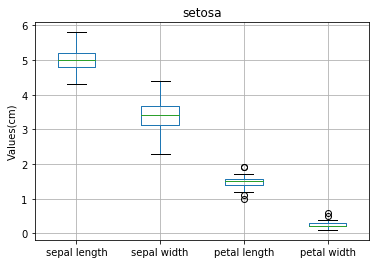

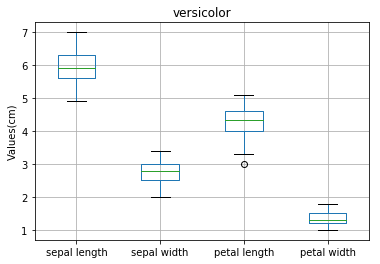

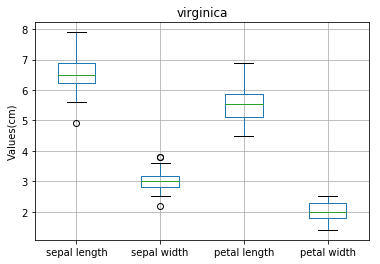

In [6]:
#2.5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
d1[["sepal length", "sepal width", "petal length", "petal width"]].boxplot()
plt.ylabel("Values(cm)")
plt.title("setosa")
plt.show()

d2[["sepal length", "sepal width", "petal length", "petal width"]].boxplot()
plt.ylabel("Values(cm)")
plt.title("versicolor")
plt.show()

d3[["sepal length", "sepal width", "petal length", "petal width"]].boxplot()
plt.ylabel("Values(cm)")
plt.title("virginica")
plt.show()

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000


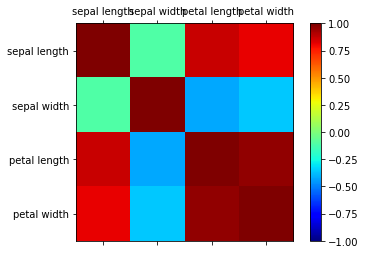

In [7]:
#2.6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
cor=pdf[["sepal length", "sepal width", "petal length", "petal width"]].corr()
print(cor.head(4))

names=["sepal length", "sepal width", "petal length", "petal width"]
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cor, vmin=-1, vmax=1,cmap='jet')
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

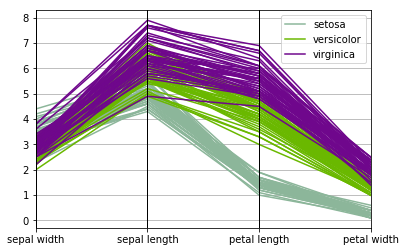

In [8]:
#2.7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
pdf["l_names"] = pdf["labels"].map(lambda x: species_wheel.get(int(x)))

pd.plotting.parallel_coordinates(pdf, class_column='l_names', cols=["sepal width","sepal length",  "petal length", "petal width"])
plt.show()

In [9]:
# Problem 3

import numpy as np
import pandas as pd
import statistics as sta

#3.1
def f_minkowski_distance(A,B,r):
    d=0.0
    n=len(A)
    for i in range(n):
        d+=pow(abs(A[i]-B[i]),r)
    d=pow(d,1.0/r)
    return d
#3.2
def f_T_statistics_distance(A,B):
    d=0.0
    EA=sta.mean(A)
    EB=sta.mean(B)
    std_A_B=sta.stdev((np.array(A)-np.array(B)).tolist())
    d=abs(EA-EB)/std_A_B
    return d
#3.3
def f_Mahalanobis_distance(A,B,M):
    d=0.0
    A_B=(np.array(A)-np.array(B))[:,np.newaxis]
    M_inv=np.linalg.inv(M)
    d=(A_B.T.dot(M_inv)).dot(A_B)
    return d[0,0]


l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
pdf["l_names"] = pdf["labels"].map(lambda x: species_wheel.get(int(x)))
M=pdf[["sepal length", "sepal width", "petal length", "petal width"]].corr().values.tolist()


ri=1
A=pdf.iloc[ri,0:4].values.tolist()
ri=2
B=pdf.iloc[ri,0:4].values.tolist()
print(f_minkowski_distance(A,B,2))
print(f_T_statistics_distance(A,B))
print(f_Mahalanobis_distance(A,B,M))

0.30000000000000016
0.14638501094227935
0.24539401557566193


[[ 0.214       0.12851459  0.10235953]
 [ 0.714       0.51625186  0.50003594]
 [ 0.814       0.45663553  0.34609026]
 [ 0.894       0.56966305  0.45948187]
 [ 0.214       0.12851459  0.10235953]
 [ 1.186       0.631598    0.4632863 ]
 [ 0.606       0.41918492  0.40008578]
 [ 0.194       0.12048236  0.10109872]
 [ 1.314       0.85235906  0.68922013]
 [ 0.694       0.4419457   0.40075278]
 [ 0.694       0.45223445  0.4024736 ]
 [ 0.494       0.26928794  0.20745355]
 [ 0.914       0.56330806  0.50129694]
 [ 1.714       0.94515395  0.7286897 ]
 [ 1.614       0.9800592   0.8152468 ]
 [ 1.786       1.1501808   0.94624937]
 [ 1.106       0.6057359   0.46024495]
 [ 0.206       0.12536347  0.10189401]
 [ 1.286       0.7998225   0.7026672 ]
 [ 0.486       0.32204968  0.3002541 ]
 [ 0.794       0.4801208   0.4061128 ]
 [ 0.486       0.27002963  0.2087544 ]
 [ 1.014       0.6200935   0.4987029 ]
 [ 0.786       0.41001952  0.28931943]
 [ 0.794       0.49650377  0.44174936]
 [ 0.694       0.52203065

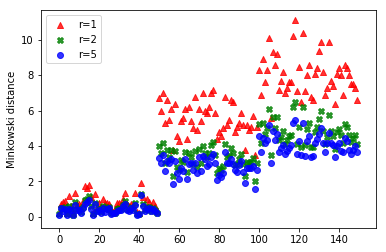

In [10]:
# Problem 4

import numpy as np
import pandas as pd
import statistics as sta
import matplotlib.pyplot as plt


l_data = np.loadtxt("processed_iris_data.txt")
pdf = pd.DataFrame(data=l_data, columns=["sepal length", "sepal width", "petal length", "petal width", "labels"])
d1 = pdf.loc[pdf['labels'] == 1]
d2 = pdf.loc[pdf['labels'] == 2]
d3 = pdf.loc[pdf['labels'] == 3]
species_wheel = {1: "setosa",
                 2: "versicolor",
                 3: "virginica"}
pdf["l_names"] = pdf["labels"].map(lambda x: species_wheel.get(int(x)))
# M=pdf[["sepal length", "sepal width", "petal length", "petal width"]].corr().values.tolist()
M=pdf[["sepal length", "sepal width", "petal length", "petal width"]].cov().values


ri=1
A=pdf.iloc[ri,0:4].values.tolist()
ri=2
B=pdf.iloc[ri,0:4].values.tolist()
# print(f_minkowski_distance(A,B,2))
# print(f_T_statistics_distance(A,B))
# print(f_Mahalanobis_distance(A,B,M))

n_d=[5.0,3.5,1.46,0.254]
#4.1
mda=np.zeros((3,150),dtype=np.float32)
for i in range(150):
    mda[0,i]=f_minkowski_distance(n_d,pdf.iloc[i,0:4].values.tolist(),1)
for i in range(150):
    mda[1, i] = f_minkowski_distance(n_d, pdf.iloc[i, 0:4].values.tolist(), 2)
for i in range(150):
    mda[2,i]=f_minkowski_distance(n_d,pdf.iloc[i,0:4].values.tolist(),5)

print(mda.T)

x=np.arange(150)
plt.scatter(x, mda[0,:],marker="^",  c="r", alpha=0.8,label="r=1")
plt.scatter(x, mda[1,:],marker="X",  c="g", alpha=0.8,label="r=2")
plt.scatter(x, mda[2,:],marker="o",  c="b", alpha=0.8,label="r=5")
plt.ylabel("Minkowski distance")
plt.legend(loc=0)
plt.show()

[[ 0.15168469]
 [ 2.2654004 ]
 [ 0.71004903]
 [ 1.4362897 ]
 [ 0.12393462]
 [ 1.2100849 ]
 [ 0.97097325]
 [ 0.15055564]
 [ 2.7963603 ]
 [ 1.447363  ]
 [ 0.933182  ]
 [ 1.0395494 ]
 [ 1.8728997 ]
 [ 2.3987591 ]
 [ 5.54218   ]
 [ 5.5939264 ]
 [ 2.8452113 ]
 [ 0.42103168]
 [ 2.2205632 ]
 [ 0.6998835 ]
 [ 1.3016233 ]
 [ 0.56150645]
 [ 0.80747753]
 [ 1.2843727 ]
 [ 3.7565362 ]
 [ 2.0280414 ]
 [ 0.30523875]
 [ 0.33056977]
 [ 0.8812625 ]
 [ 1.2653006 ]
 [ 1.1429569 ]
 [ 3.325948  ]
 [ 4.668895  ]
 [ 3.389321  ]
 [ 1.447363  ]
 [ 2.177407  ]
 [ 3.5406575 ]
 [ 1.447363  ]
 [ 2.2093663 ]
 [ 0.26795492]
 [ 0.5314528 ]
 [12.8341675 ]
 [ 1.7675973 ]
 [ 2.1030326 ]
 [ 2.0722654 ]
 [ 2.4260852 ]
 [ 1.6884346 ]
 [ 0.98608124]
 [ 0.60126656]
 [ 0.48994875]
 [ 7.4155836 ]
 [ 3.1720026 ]
 [ 6.4223466 ]
 [ 7.9770784 ]
 [ 5.9763427 ]
 [ 6.504991  ]
 [ 3.635162  ]
 [ 7.315588  ]
 [ 6.244319  ]
 [ 6.092715  ]
 [12.122105  ]
 [ 3.116217  ]
 [12.289163  ]
 [ 4.8678713 ]
 [ 3.3550632 ]
 [ 5.7098207 ]
 [ 6.13727

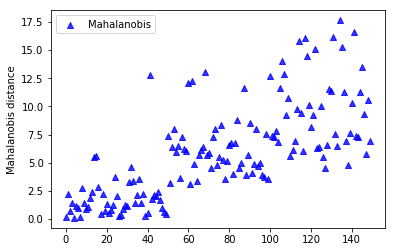

In [11]:
#4.2
mahda=np.zeros((1,150),dtype=np.float32)
for i in range(150):
    mahda[0,i]=f_Mahalanobis_distance(n_d,pdf.iloc[i,0:4].values.tolist(),M)
print(mahda.T)
x=np.arange(150)
plt.scatter(x, mahda[0,:],marker="^",  c="b", alpha=0.8,label="Mahalanobis")
plt.ylabel("Mahalanobis distance")
plt.legend(loc=0)
plt.show()

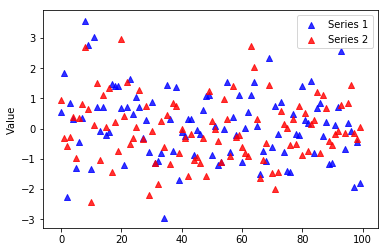

In [12]:
# Problem 5
import numpy as np
import matplotlib.pyplot as plt
import statistics as sta
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn import preprocessing


f_raw = open("HW1 - Time Series Data File.txt", "r")
r_lines = f_raw.readlines()
f_raw.close()
n_records = len(r_lines) - 1
p_data = np.zeros((n_records, 2), dtype=np.float32)

for i in range(n_records):
    l_fields = r_lines[i + 1].split("\t")
    p_data[i, 0] = float(l_fields[0])
    p_data[i, 1] = float(l_fields[1])

# 5.1
x = np.arange(n_records)
plt.scatter(x, p_data[:, 0], marker="^", c="b", alpha=0.8, label="Series 1")
plt.scatter(x, p_data[:, 1], marker="^", c="r", alpha=0.8, label="Series 2")
plt.ylabel("Value")
plt.legend(loc=0)
plt.show()

In [13]:
# 5.2

t_dis = f_T_statistics_distance(p_data[:, 0].tolist(), p_data[:, 1].tolist())
print(t_dis)

0.12852838355341822


In [14]:
# 5.3
cor1=np.corrcoef(p_data[:,0],p_data[:,1])
print(cor1[0,1])

0.4030436569119414


In [15]:
# 5.4
l_data = np.loadtxt("processed_iris_data.txt")
normed_matrix=preprocessing.scale(l_data[:,0:4])
np.savetxt("std_processed_iris_data.txt", normed_matrix, fmt='%.6f', )